## OMLDS End-to-End Machine Learning Project

### Kaggle Credit Fraud Detection Dataset
### Source: https://www.kaggle.com/datasets/kartik2112/fraud-detection

### Date: 05/17/2023

#### Objective

The main objective in this notebook is to perform an exploratory data analysis on the Kaggle credit fraud detection dataset (see Source above). There are multiple reasons to explore a dataset, usually being:

-  Understanding the data before building an ML model

-  Detect interesting patterns that can help in the feature engineering phase

-  Acquire insights

#### About the dataset

This is a **simulated** credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

#### Exploratory Data Analysis steps:

1.  Read data documentation

2.  Univariate data analysis

3.  Bivariate data analysis

4.  Multivariate data analysis

5.  Insights and next steps

In [6]:
# install seaborn version 0.11.2
# !pip install seaborn==0.11.2

In [5]:
sns.__version__

'0.11.2'

In [7]:
# !pip install pingouin

In [3]:
pg.__version__

'0.5.3'

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# statistical tests
import pingouin as pg

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 16)

In [4]:
# moount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# read train dataset
df_raw = pd.read_csv('/content/drive/MyDrive/kaggle_credit_fraud_detection/fraudTrain.csv', index_col = [0], parse_dates = ['trans_date_trans_time', 'dob'])
df_raw

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [6]:
# data type info
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

#### Questions:

1.  Can you identify some columns that have the wrong data type?

2.  Which column is the target variable?

In [7]:
# coerce `cc_num` and `zip` to object type
df_raw['cc_num'] = df_raw['cc_num'].astype('object')
df_raw['zip'] = df_raw['zip'].astype('object')

In [8]:
# verify duplicate rows
df_raw.duplicated().sum()

0

In [9]:
# verify missing values
df_raw.isnull().sum().sum()

0

In [10]:
# descriptive statistics
df_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1296675.0,1.349244e+09,1.284128e+07,1.325376e+09,1.338751e+09,1.349250e+09,1.359385e+09,1.371817e+09
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01
is_fraud,1296675.0,5.788652e-03,7.586269e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


array([[<Axes: title={'center': 'trans_date_trans_time'}>,
        <Axes: title={'center': 'amt'}>, <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'city_pop'}>,
        <Axes: title={'center': 'dob'}>],
       [<Axes: title={'center': 'unix_time'}>,
        <Axes: title={'center': 'merch_lat'}>,
        <Axes: title={'center': 'merch_long'}>],
       [<Axes: title={'center': 'is_fraud'}>, <Axes: >, <Axes: >]],
      dtype=object)

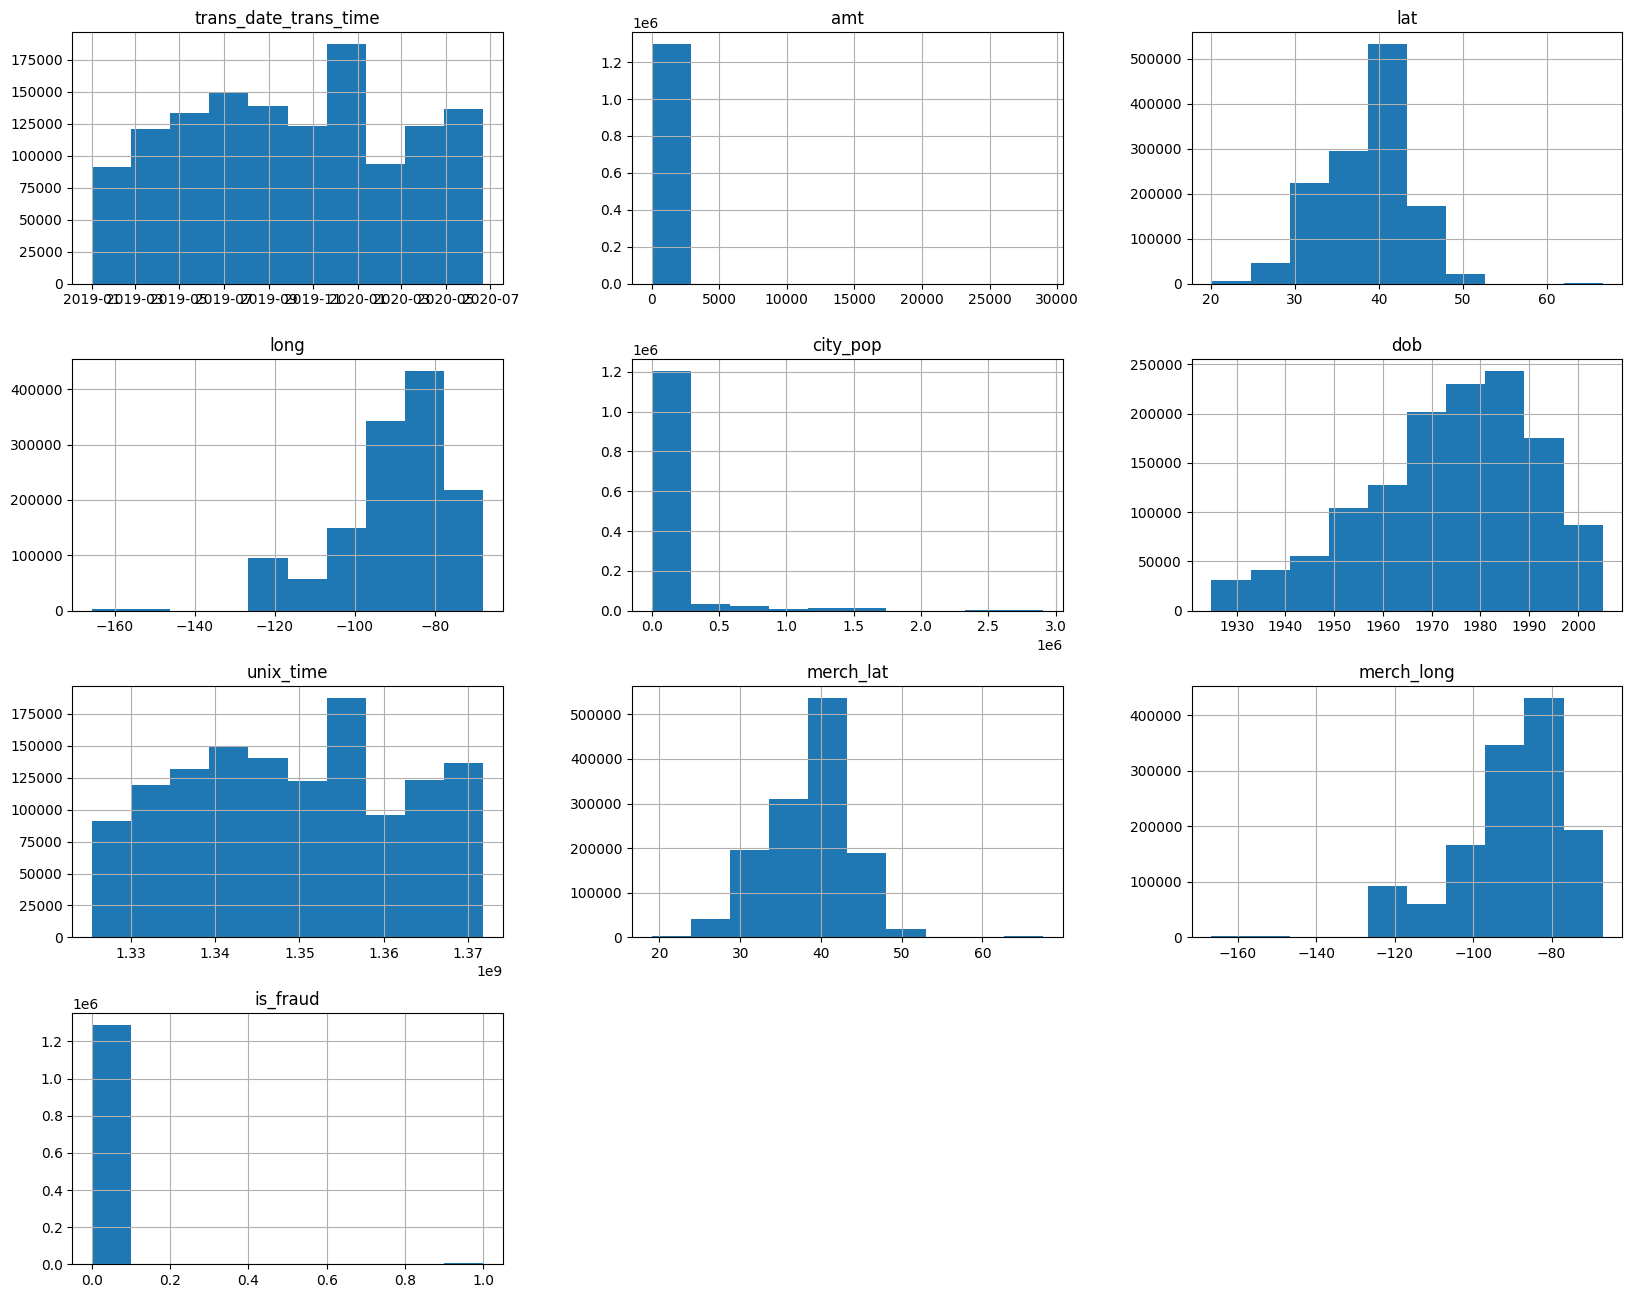

In [11]:
# plot histograms
df_raw.hist()

In [12]:
# target `is_fraud` count
df_raw['is_fraud'].value_counts(normalize=True)

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

Comment: The target class 'is_fraud' is highly imbalanced.

In [13]:
# unique values per column/variable
df_raw.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [14]:
# unique values for object type variables
df_raw.select_dtypes(include = 'object').nunique()

cc_num           983
merchant         693
category          14
first            352
last             481
gender             2
street           983
city             894
state             51
zip              970
job              494
trans_num    1296675
dtype: int64

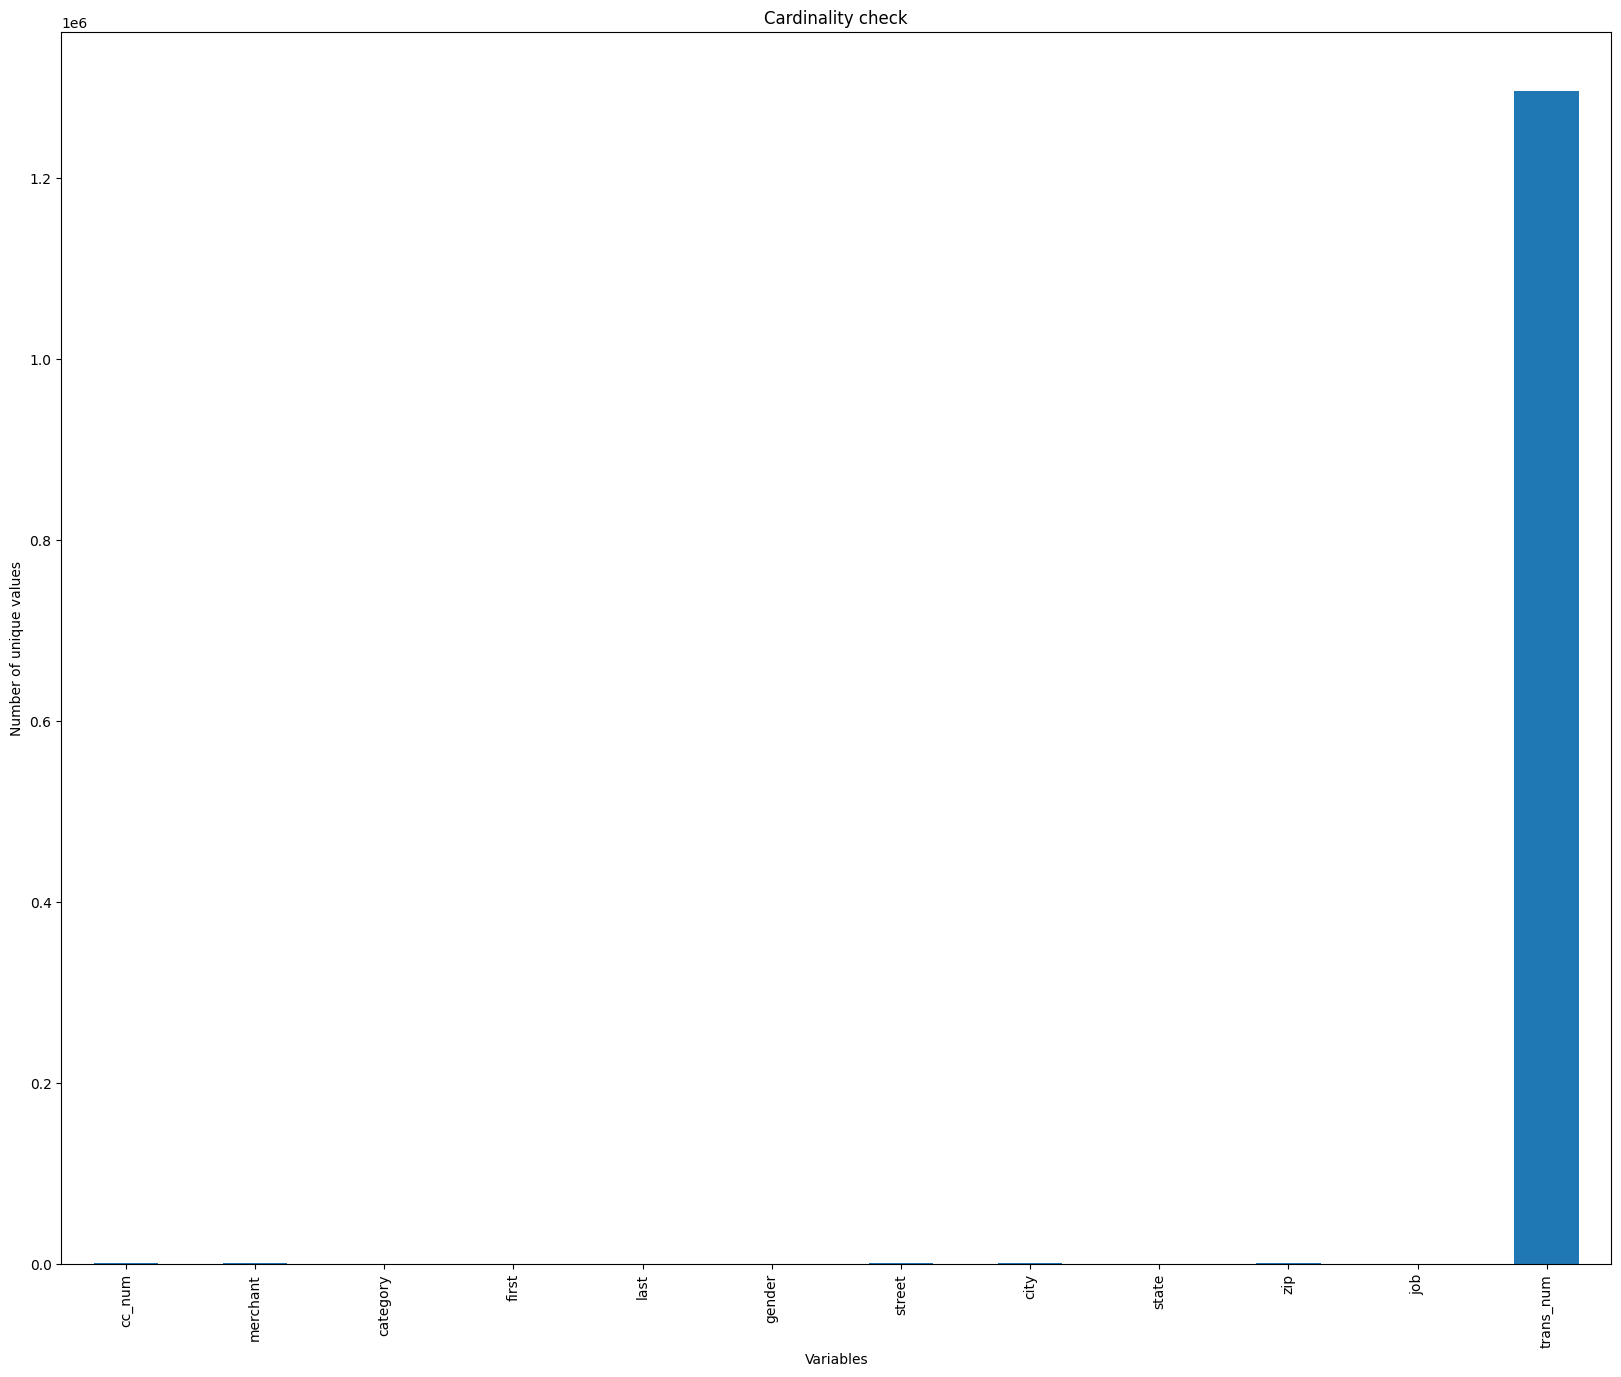

In [15]:
# plot unique values (bar chart)
df_raw.select_dtypes(include = 'object').nunique().plot.bar()
plt.xlabel('Variables')
plt.ylabel('Number of unique values')
plt.title('Cardinality check')
plt.show()

In [16]:
# subset features with less than 15 unique values
cols_unique_less_15 = df_raw.loc[:, df_raw.nunique() < 16].columns.to_list()
cols_unique_less_15

['category', 'gender', 'is_fraud']

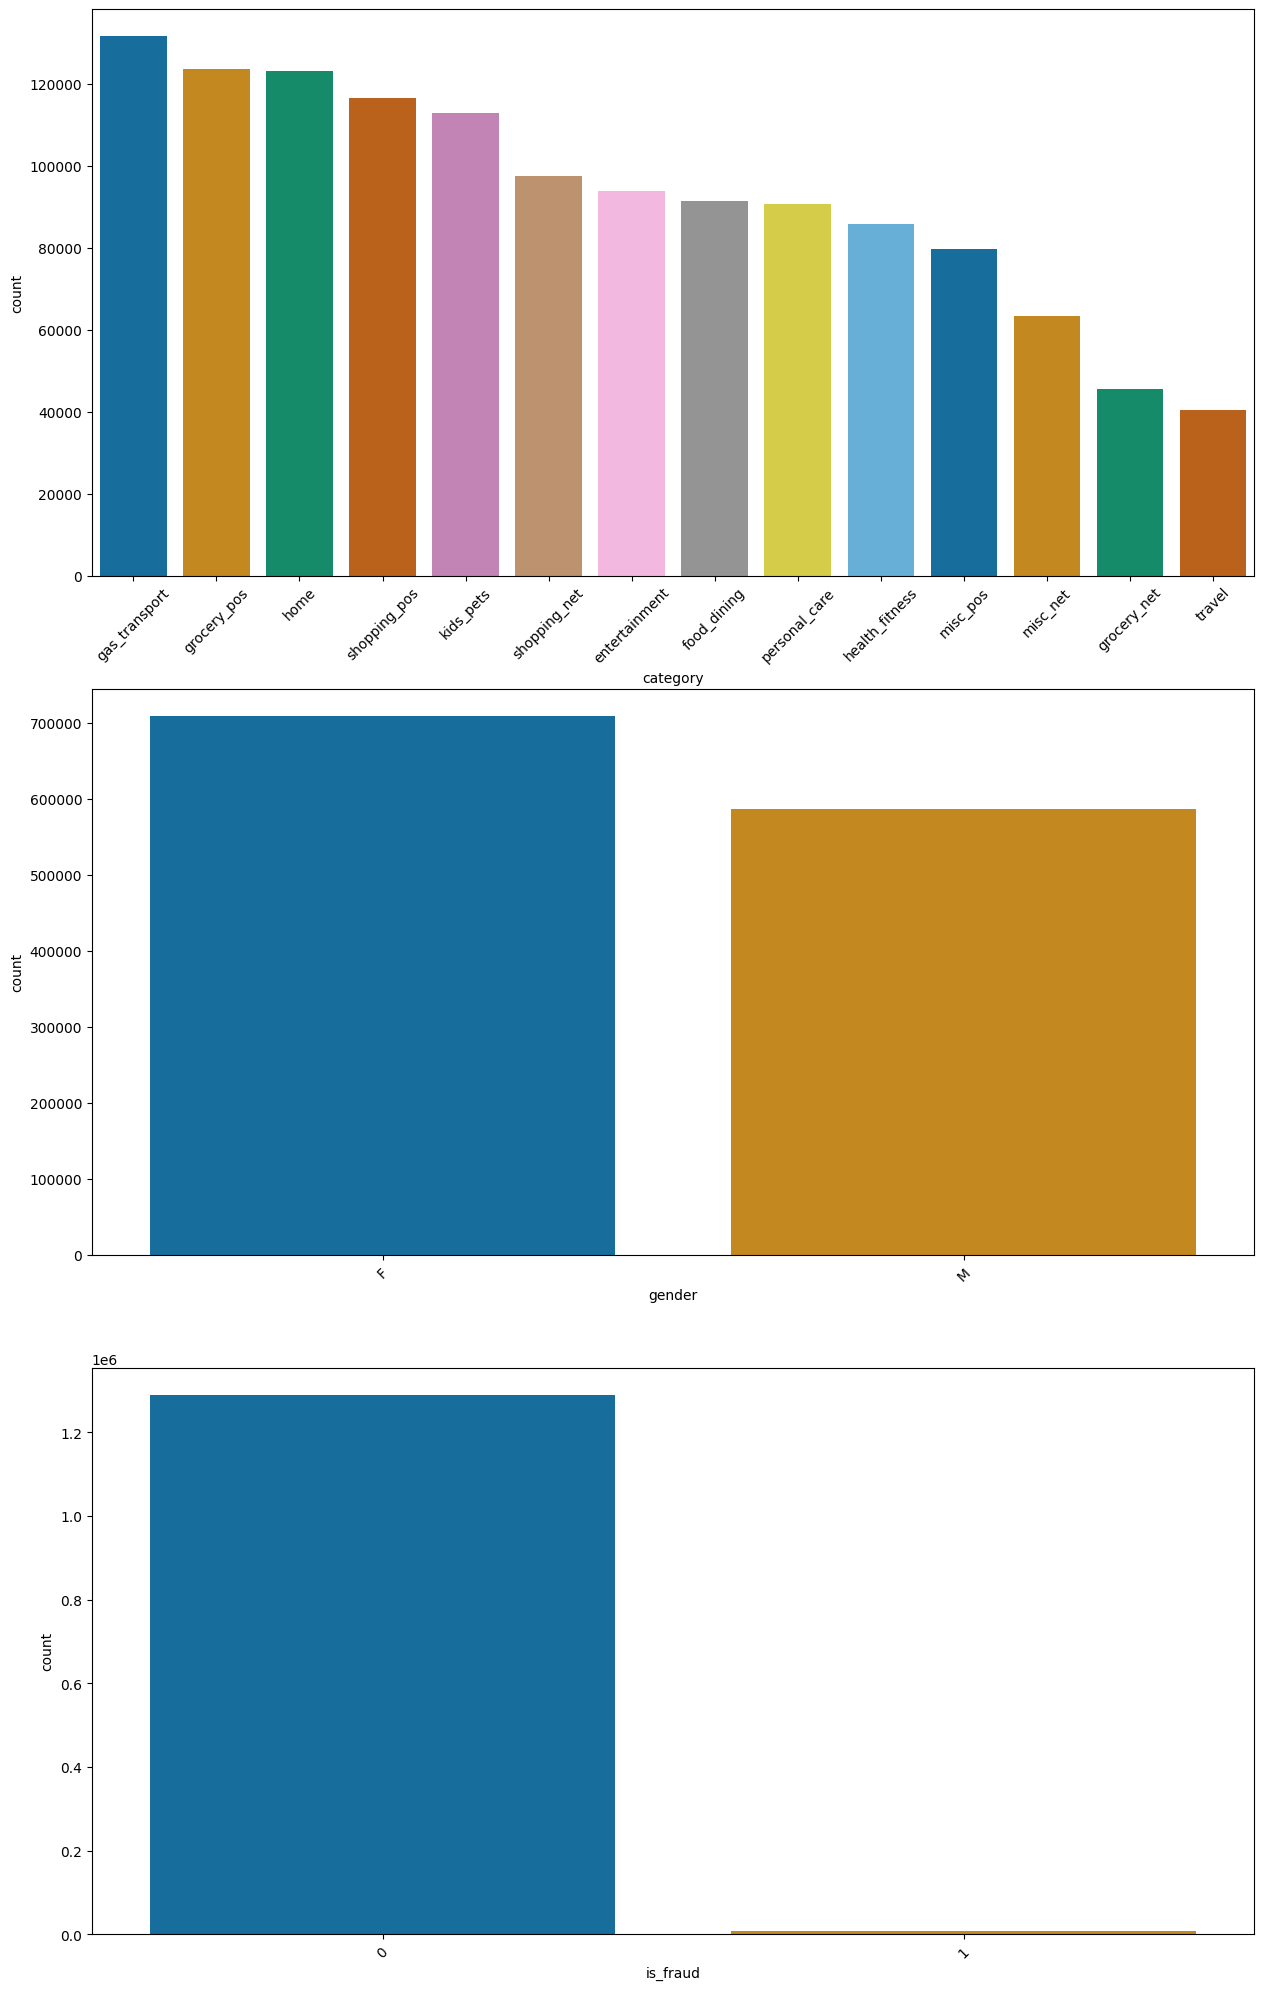

In [17]:
# plot categorical columns less than 15 unique values using seaborn
f, axes = plt.subplots(3, 1, figsize=(15, 25), sharex=False)
for ax, feature in zip(axes.flat, df_raw[cols_unique_less_15]):
    sns.countplot(df_raw[feature],
                  order =  df_raw[feature].value_counts().index,
                  palette='colorblind',
                  ax=ax)
    ax.tick_params(axis = 'x', rotation = 45)

In [18]:
# create a stratified sampling from 30% of total `df_raw` rows
seed = 2019
frac = 0.2 # 20% of total dataset observations - rows
df_sample = df_raw.groupby('is_fraud', group_keys=False).apply(lambda x: x.sample(frac=frac, random_state=seed)).reset_index(drop = True)
df_sample

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-07-25 16:20:35,4587657402165341815,fraud_Hills-Witting,shopping_net,265.89,Amber,Lewis,F,6296 John Keys Suite 858,Pembroke Township,...,41.0646,-87.5917,2135,"Psychotherapist, child",2004-05-08,d0e8265dc7e7b979c1533abebe95402c,1343233235,40.991185,-88.538586,0
1,2019-10-23 04:47:17,347612609554823,fraud_Kling Inc,gas_transport,68.21,Robert,James,M,18316 Cannon Place,Newport,...,44.8393,-69.2675,3228,Lexicographer,1995-12-28,71a947bf4d90e76e4d5b9a5f1b1ec8b4,1350967637,44.680256,-69.390510,0
2,2020-03-30 09:50:38,6011652924285713,fraud_DuBuque LLC,grocery_pos,95.39,Kathryn,Smith,F,19838 Tonya Prairie Apt. 947,Rocky Mount,...,38.2911,-92.7059,1847,Tax inspector,1988-10-26,dfda32052a68f1452b1190b182672cb0,1364637038,38.954895,-91.927764,0
3,2019-01-28 22:32:55,4839615922685395,fraud_Grimes LLC,entertainment,21.39,Phillip,Robertson,M,85344 Smith Gateway Apt. 280,Harrodsburg,...,39.0130,-86.5457,76,Social researcher,1955-05-06,8858dbc699716a100343e8402c3d2d17,1327789975,39.440657,-85.829947,0
4,2019-04-24 15:36:30,4989847570577635369,fraud_Ullrich Ltd,kids_pets,36.53,Vanessa,Anderson,F,21178 Brittney Locks,Prosperity,...,34.1832,-81.5324,8333,Archaeologist,1994-07-09,b73f49b5c7081b864f1ba77678d86fce,1335281790,34.267058,-80.615114,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259330,2019-12-23 21:23:13,6517779374888867,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,1050.27,Jeremy,Nunez,M,787 Allen Mount,Roland,...,34.8829,-92.5192,2623,Homeopath,1966-07-25,227a8b0acbaa631cae9ac3fdce88049d,1356297793,35.433872,-92.759896,1
259331,2019-07-25 22:05:38,377113842678100,fraud_Medhurst PLC,shopping_net,1174.24,Billy,Gallagher,M,673 Delgado Burg,Greenwich,...,39.4055,-75.3209,804,Insurance risk surveyor,1965-03-25,81fd2a43613420e91682c6da18830316,1343253938,38.663157,-75.148225,1
259332,2019-04-01 00:53:54,3566094707272327,fraud_Ernser-Lynch,food_dining,98.70,Kristina,Stewart,F,47029 Jimmy Tunnel Apt. 106,Newhall,...,34.3795,-118.5230,34882,Health physicist,1971-04-25,bada495d847ca4b0527ff6fcd8f3a10d,1333241634,34.956507,-118.702334,1
259333,2019-02-23 14:24:53,4157213332670159,fraud_Kozey-Boehm,shopping_net,970.02,Bryan,Gill,M,48635 Paul Hills,Gaines,...,42.8813,-83.8855,3764,Veterinary surgeon,1966-08-03,cdffa28b9db1178a2941ddf0d4e0f954,1330007093,43.227229,-84.086221,1


In [19]:
df_sample['is_fraud'].value_counts(normalize = True)

0    0.994212
1    0.005788
Name: is_fraud, dtype: float64

In [ ]:
# !pip install pandas-profiling

# using ydata-profiling
# import sys
# !{sys.executable} -m pip install -U ydata-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [ ]:
# EDA - Pandas Profiling
# from pandas_profiling import ProfileReport
# from ydata_profiling import ProfileReport

In [ ]:
# run ProfileReport using df_sample
# profile = ProfileReport(df_sample,
#                         title="Kaggle Credit Card Fraud Detection Dataset Profile Report",
#                         correlations={
#                             "auto": {"calculate": True},
#                             "pearson": {"calculate": True},
#                             "spearman": {"calculate": True},
#                             "kendall": {"calculate": True},
#                             "phi_k": {"calculate": True},
#                             "cramers": {"calculate": True},
#                         },
#     )

# profile.to_file('/content/drive/MyDrive/kaggle_credit_card_fraud_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Next steps:

1.  Which variables are more correlated with the target ('is_fraud')?  Which are not?

2.  Are some variables redundant? (Hint: Compare `unix_time` to `trans_date_trans_time`)

3.  Is `amt` (transaction amount) relevant to detect fraud?

4.  What features can we extract from `trans_date_trans_time`?

5.  What features have a high correlation? Are these features redundant?

In [20]:
# convert `unix_time` to datetime type
# source: https://stackoverflow.com/questions/19231871/convert-unix-time-to-readable-date-in-pandas-dataframe
df_raw['unix_time'] = pd.to_datetime(df_raw['unix_time'], unit = 's')
df_raw

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,2012-01-01 00:00:18,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,2012-01-01 00:00:51,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,2012-01-01 00:01:16,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,2012-01-01 00:03:06,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,2013-06-21 12:12:08,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,2013-06-21 12:12:19,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,2013-06-21 12:12:32,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,2013-06-21 12:13:36,42.788940,-103.241160,0


In [21]:
# compare `unix_time` to `trans_date_trans_time`
((df_raw['trans_date_trans_time'] - df_raw['unix_time']).dt.total_seconds()/31536000).std()

0.0012395643275542744

In [22]:
# correlation between `unix_time` to `trans_date_trans_time`
df_raw['trans_date_trans_time'].astype(int).corr(df_raw['unix_time'].astype(int))

0.9999959797962505

Comment: `unix_time` and `trans_date_trans_time` are almost identical (Pearson correlation coefficient equal to 1). We can discard `unix_time` as it does not provide additional information already contained in `trans_date_trans_time`.

### Correlation analysis

-  Pearson

-  Spearman

-  Kendall

A definition of each type of method: https://python.plainenglish.io/pearson-spearman-and-kendall-tau-correlations-what-are-the-differences-d0a3963b4c94

<Axes: >

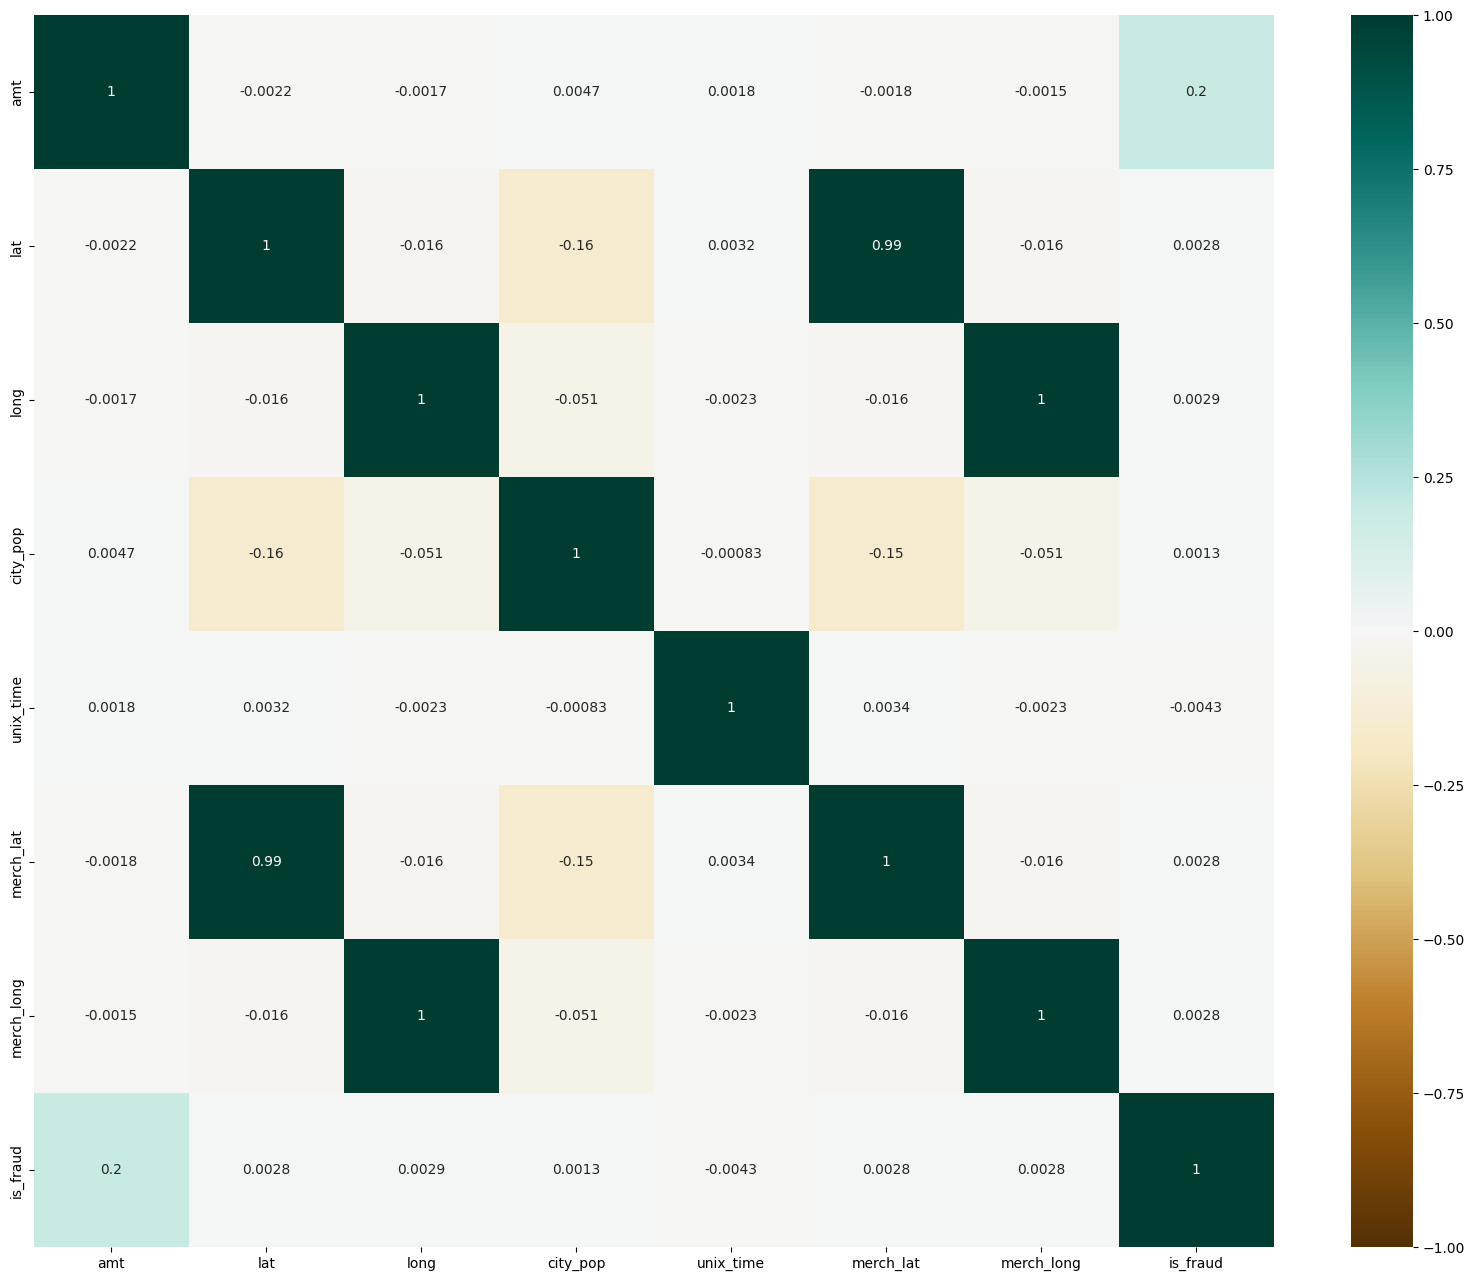

In [23]:
# pearson correlation
sns.heatmap(df_sample.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')

Comment: `lat` and `merch_lat` have a correlation of 0.99 (almost 1). Same for `long` and `merch_long`. Again, `merch_lat` and `merch_long` can be discarded, identical information already in `lat` and `long`.

<Axes: >

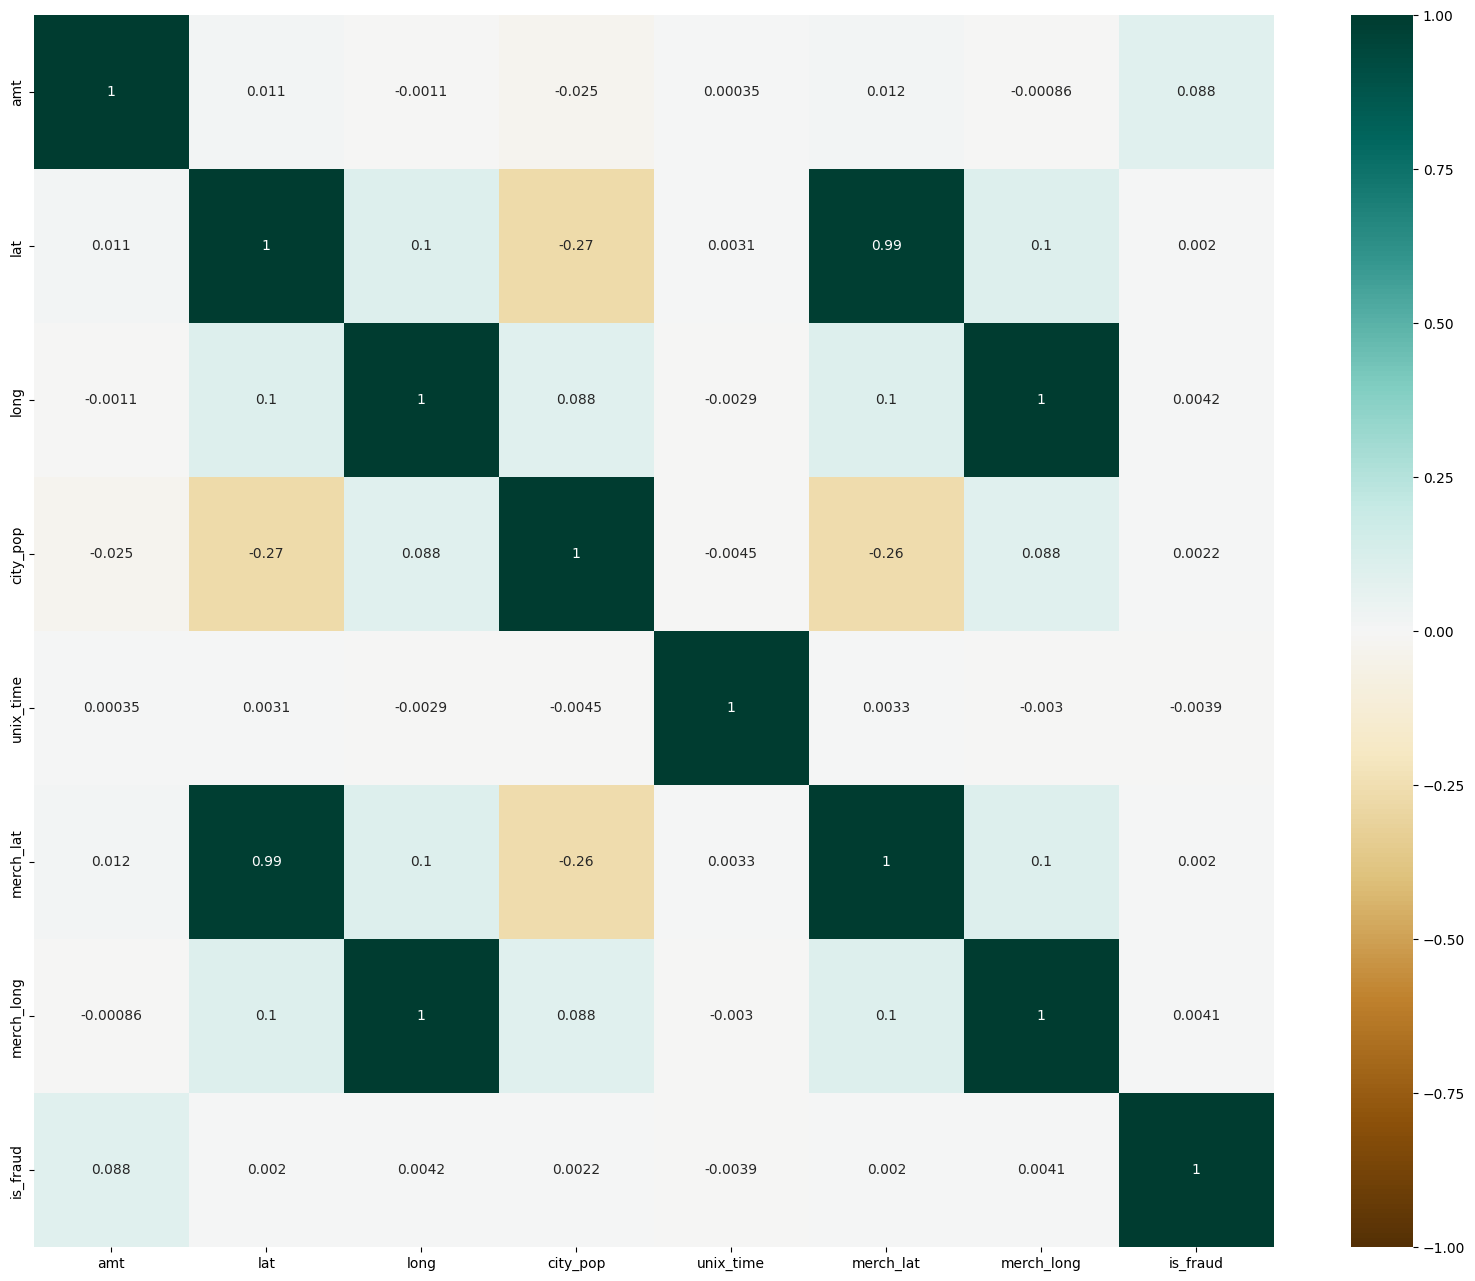

In [24]:
# spearman correlation
sns.heatmap(df_sample.corr(method = 'spearman'), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')

<Axes: >

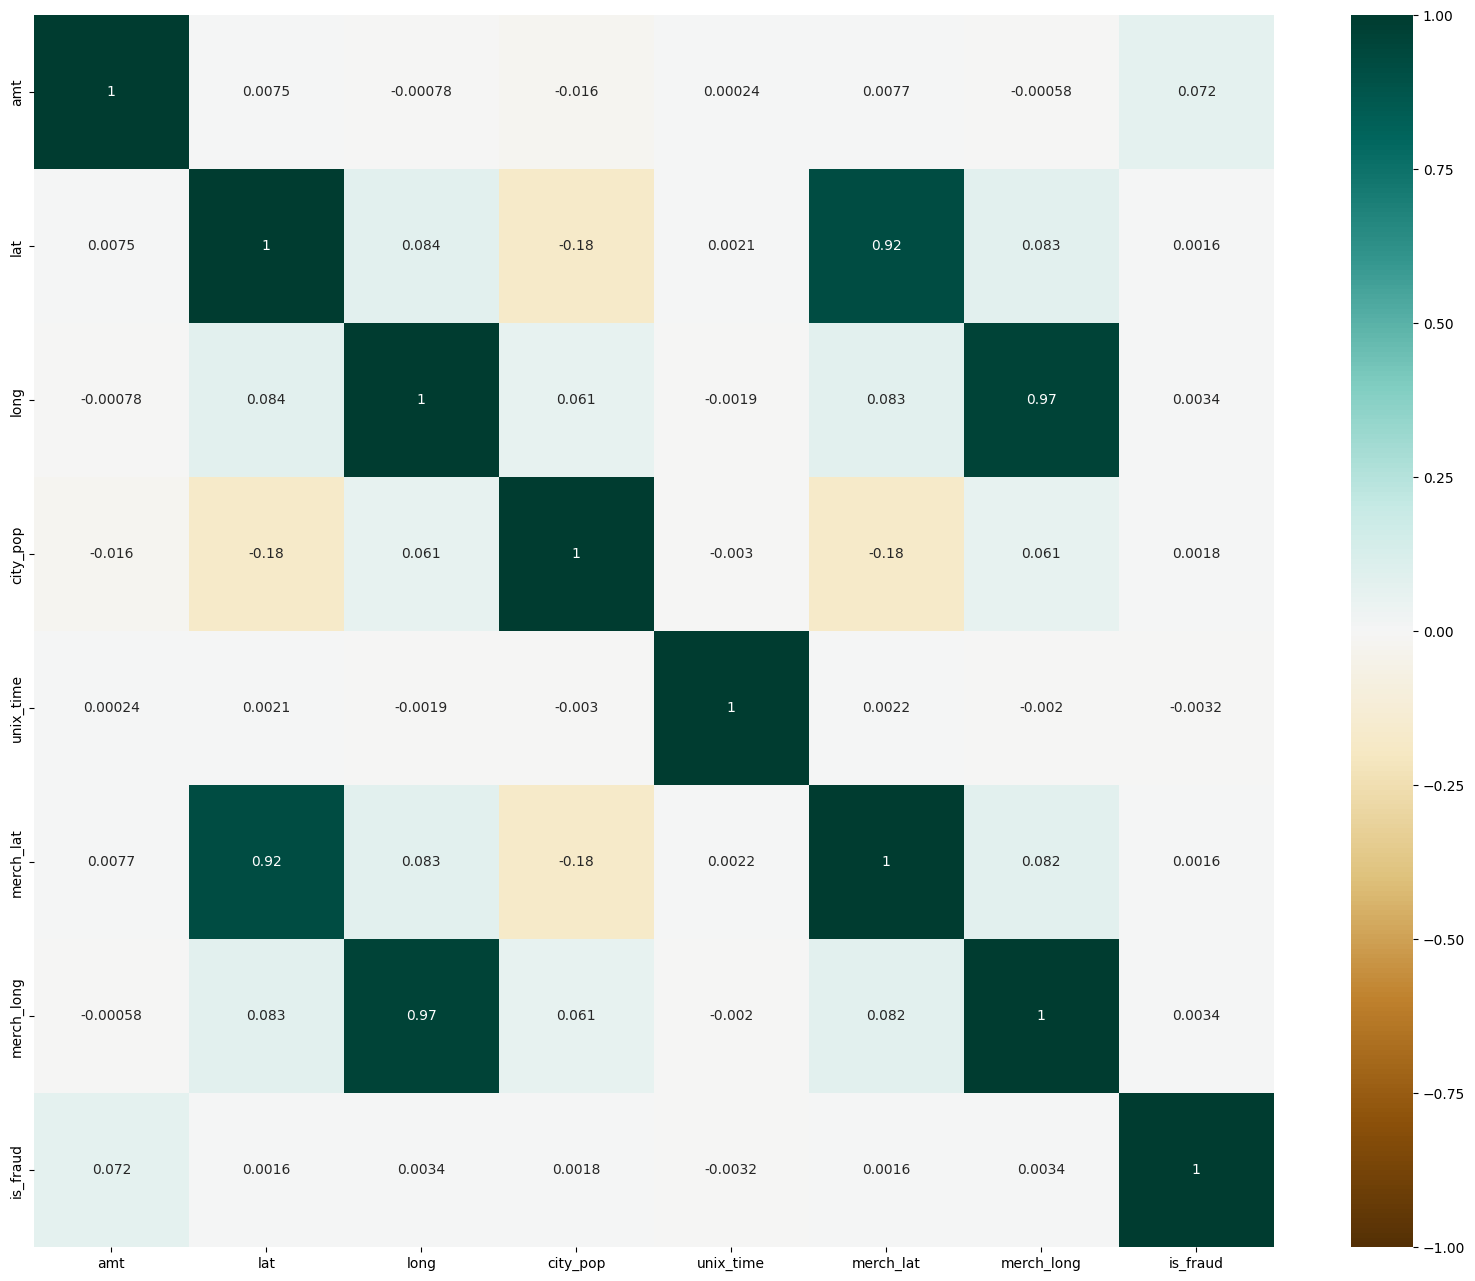

In [25]:
# kendal correlation
sns.heatmap(df_sample.corr(method = 'kendall'), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG')

### Bivariate analysis

-  Continuous - Continuous

-  Categorical - Continuous

-  Categorical - Categorical

A detail guide for choosing the appropiate data visualization: https://guides.lib.uoguelph.ca/c.php?g=700755&p=4976238

In [26]:
# calculate `age` by subtracting `trans_date` from `dob`
df_sample['trans_date'] = df_sample['trans_date_trans_time'].dt.date
df_sample['trans_date'] = pd.to_datetime(df_sample['trans_date'])
df_sample['age'] = ((df_sample['trans_date'].min() - df_sample['dob']) / pd.Timedelta(days = 365)).astype(int)

In [27]:
df_sample['age'].describe()

count    259335.000000
mean         44.797193
std          17.378037
min          13.000000
25%          31.000000
50%          43.000000
75%          56.000000
max          94.000000
Name: age, dtype: float64

Comment: `age` minimum (13) and maximum (94) values looks reasonable.

<Axes: >

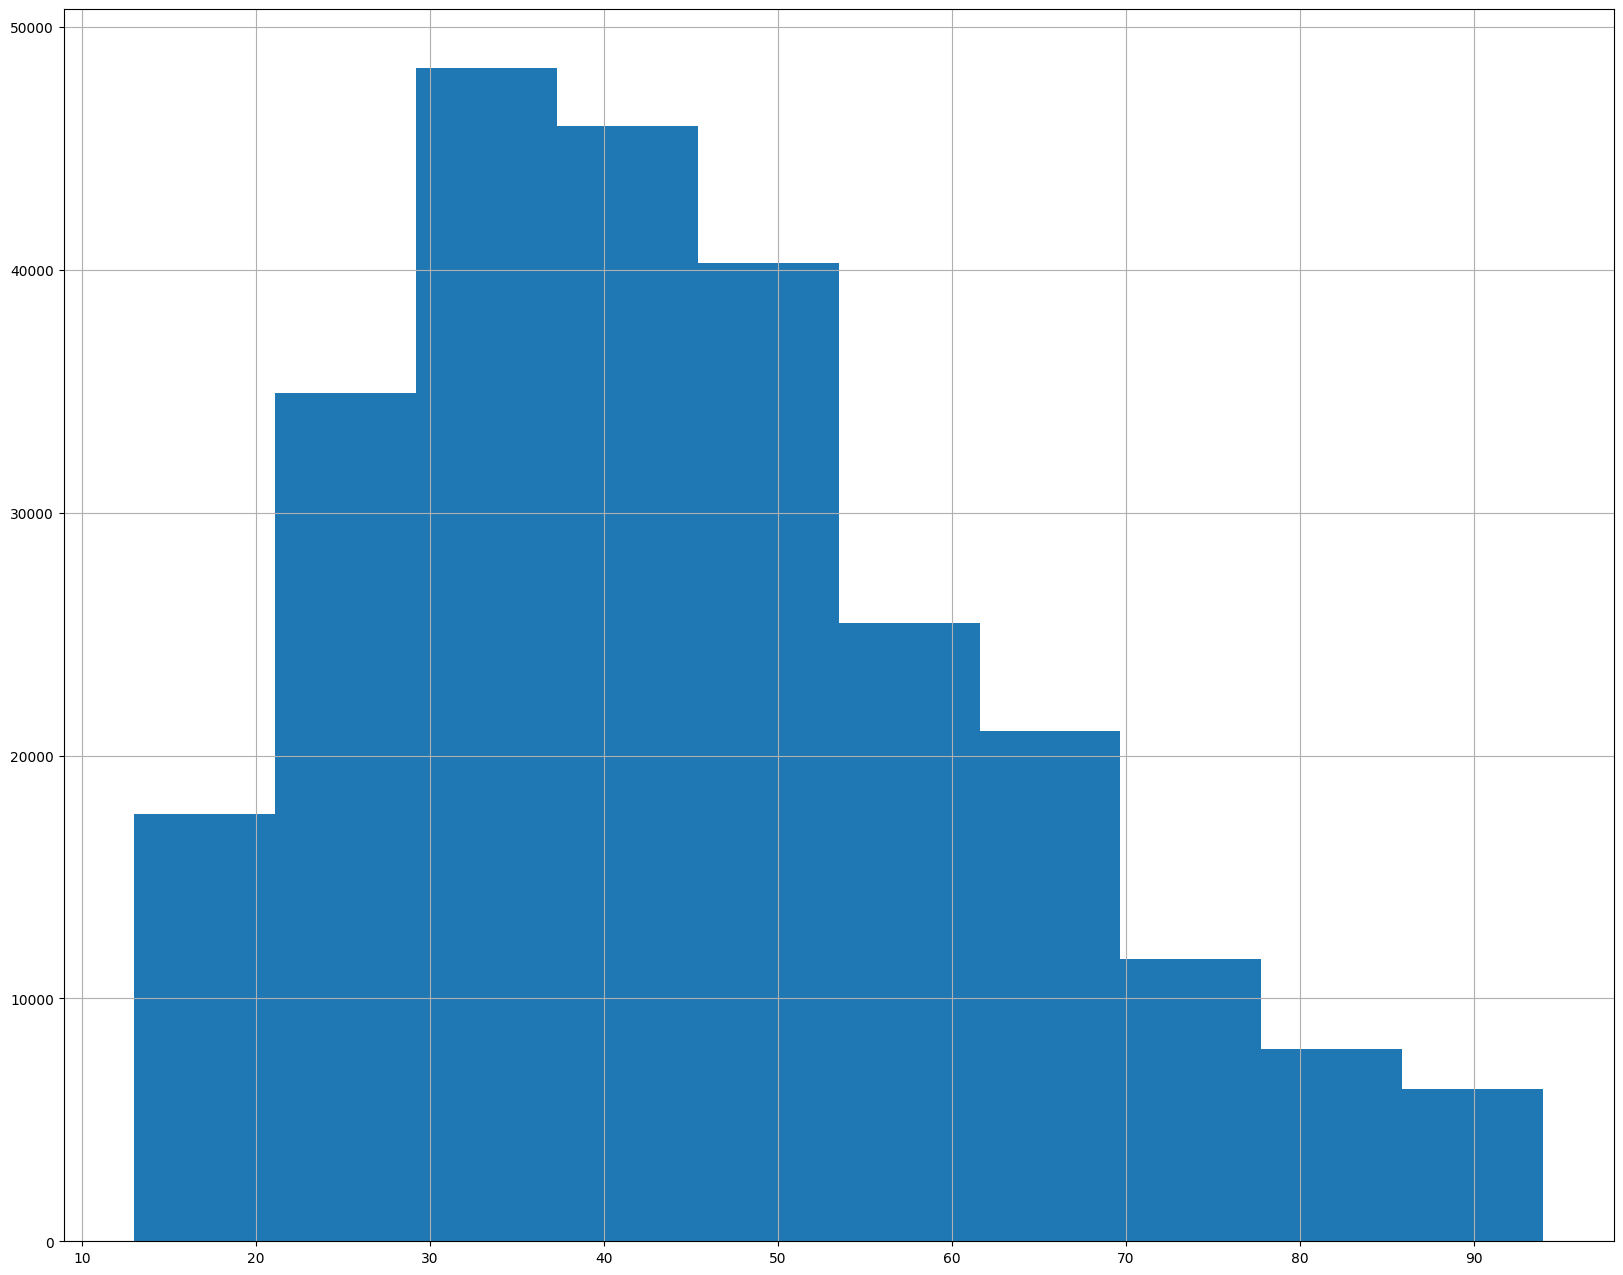

In [28]:
df_sample['age'].hist()

<Axes: xlabel='age', ylabel='amt'>

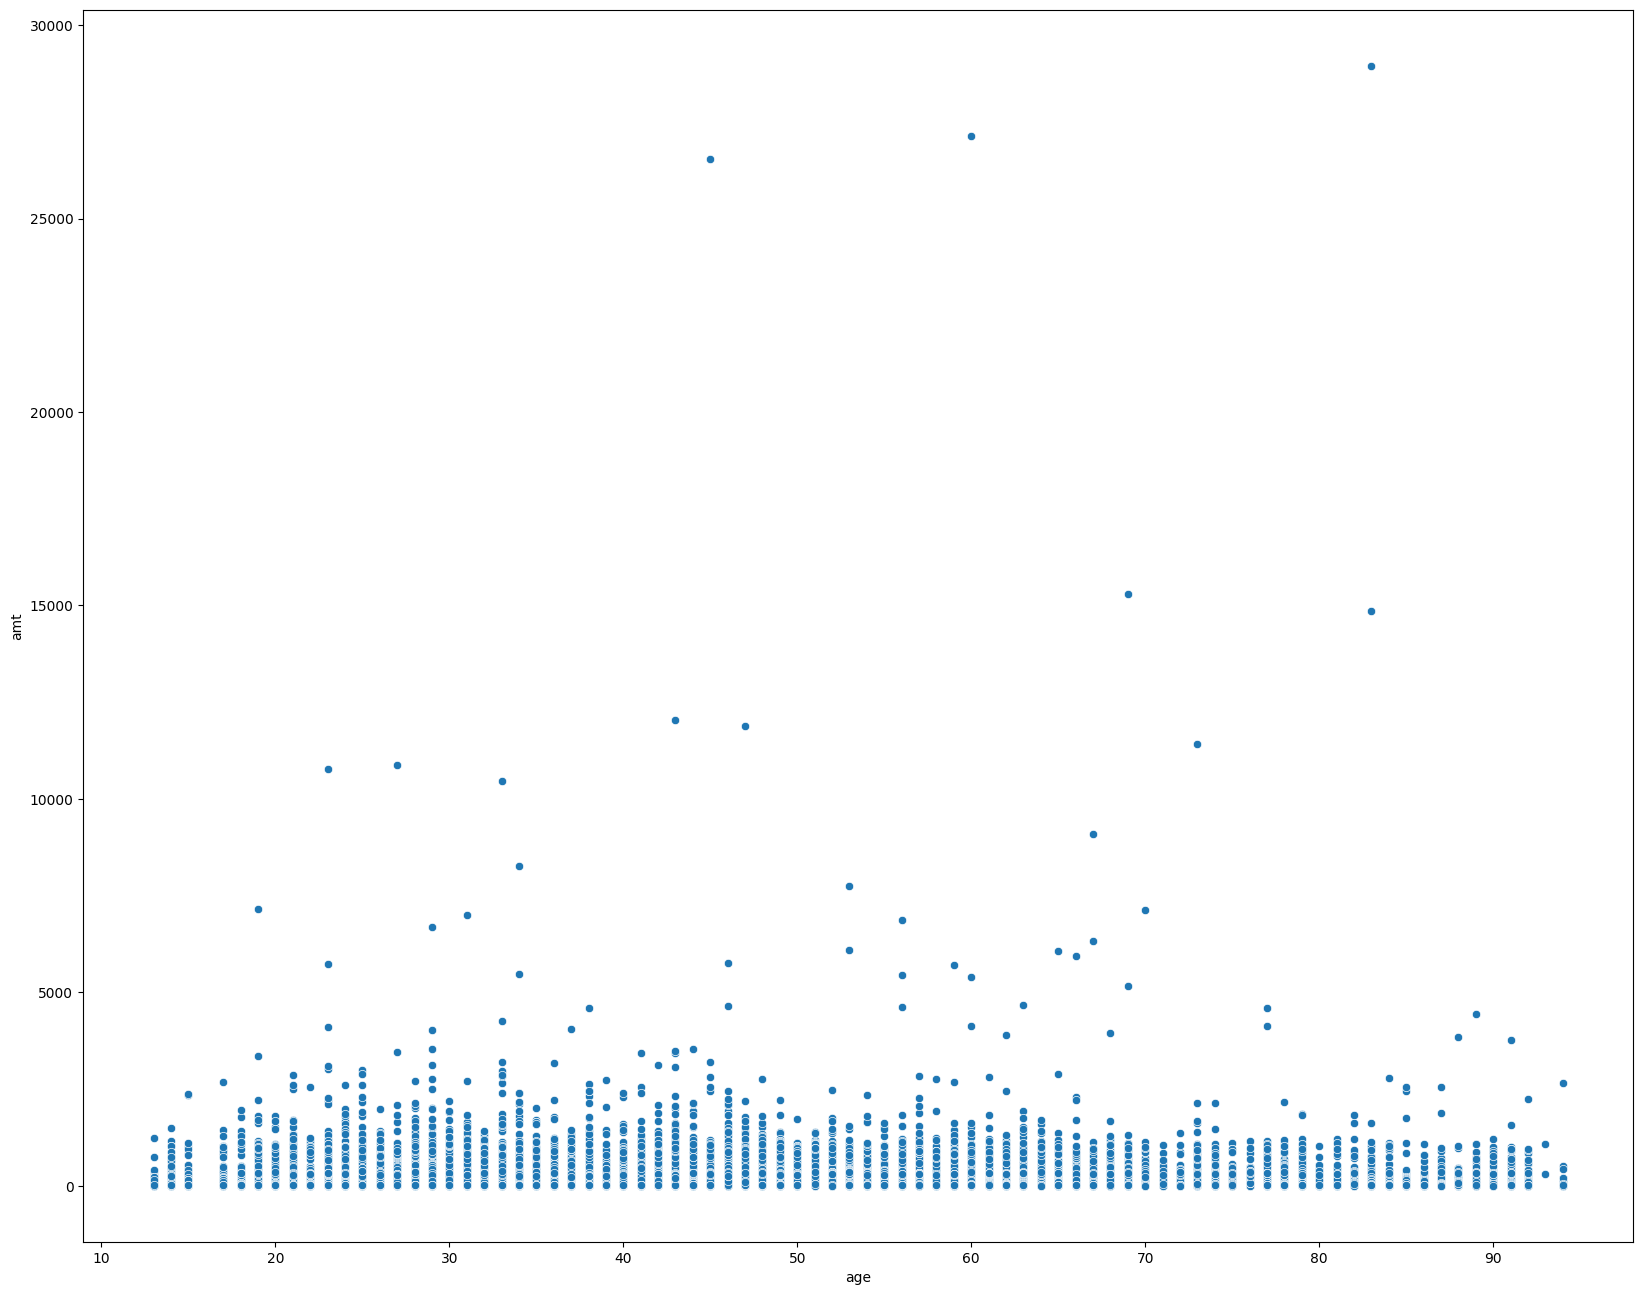

In [29]:
# `amt` and `age`
sns.scatterplot(data = df_sample, x = 'age', y = 'amt')

<Axes: xlabel='age', ylabel='amt'>

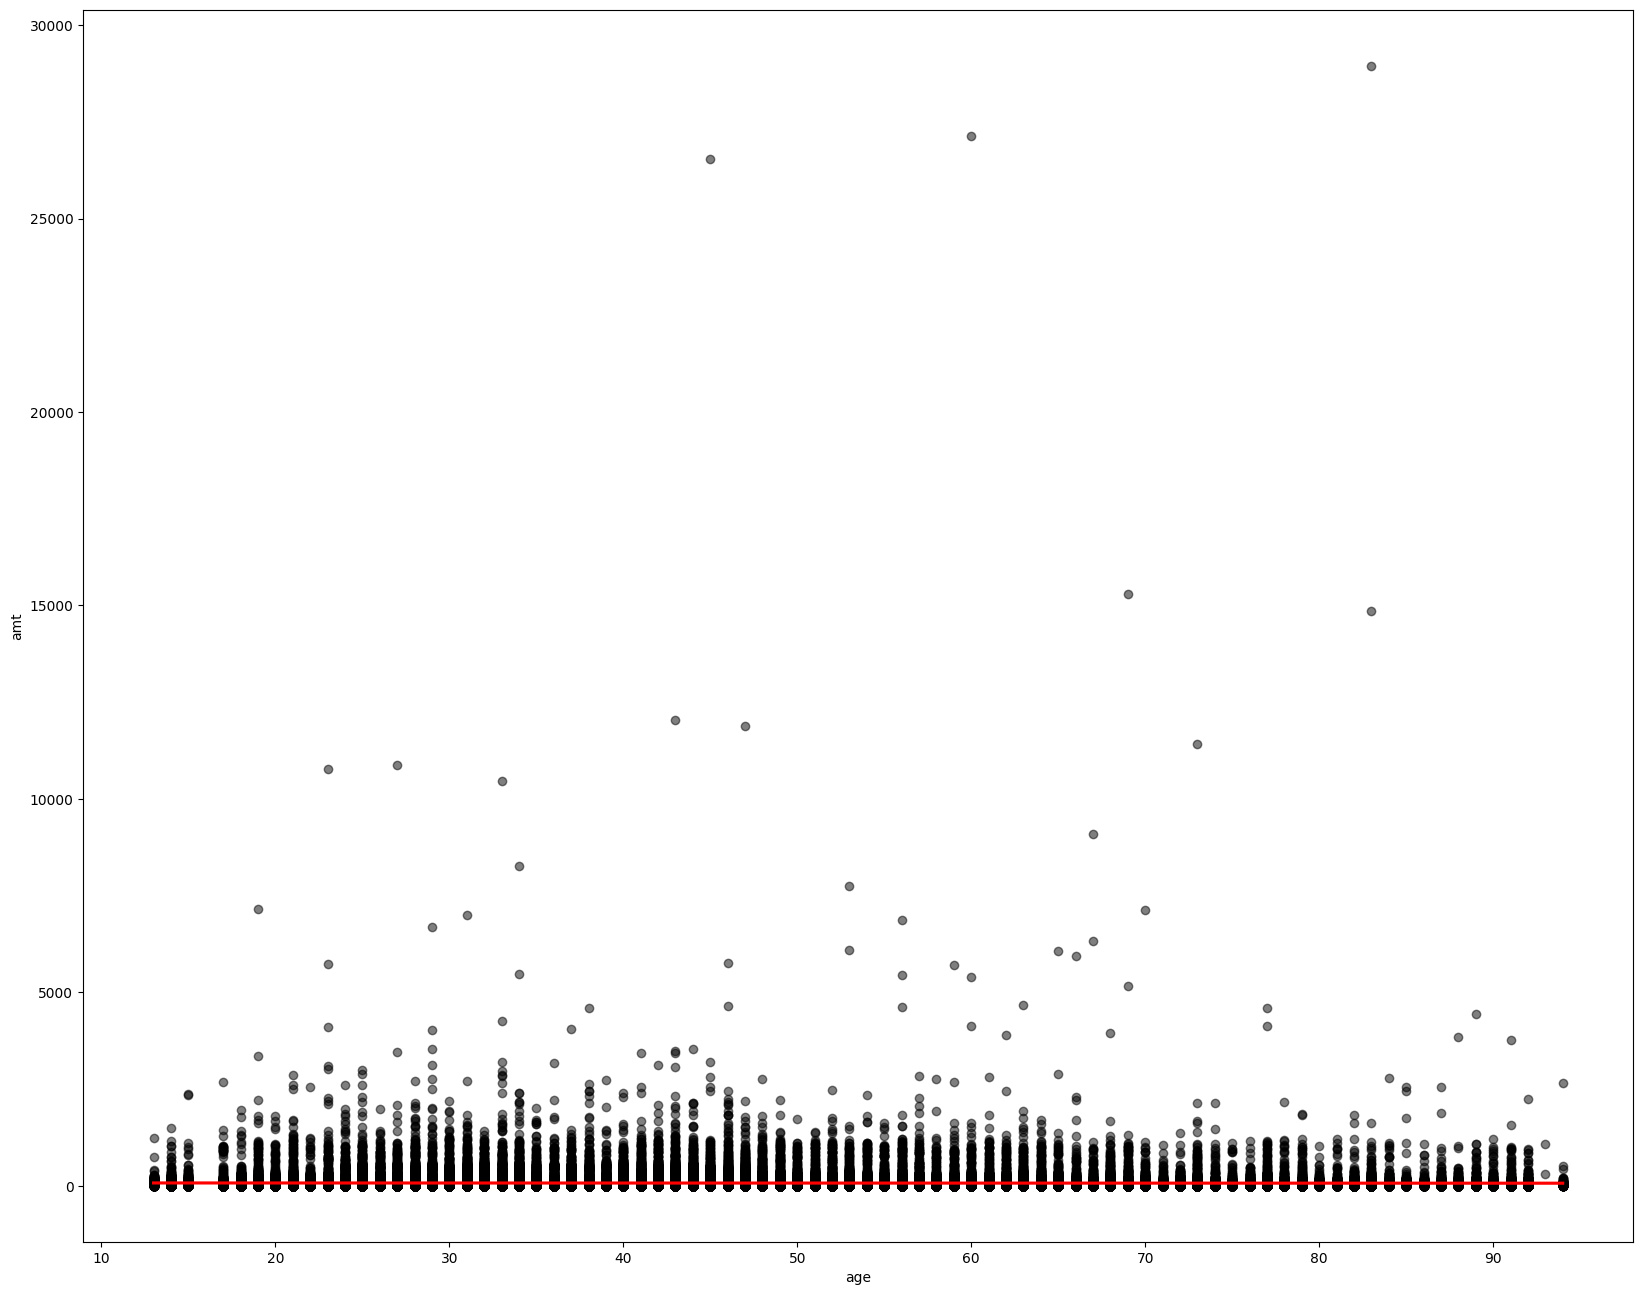

In [30]:
# regression line
sns.regplot(data = df_sample, x = 'age', y = 'amt',
            scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"})

In [31]:
# Pearson correlation coefficient between `age` and `amt`
df_sample['age'].corr(df_sample['amt'])

-0.007804748512148114

Comment: `age` and `amt` do not appear to be correlated (Pearson correlation coefficient is nearly 0).

<Axes: xlabel='is_fraud', ylabel='age'>

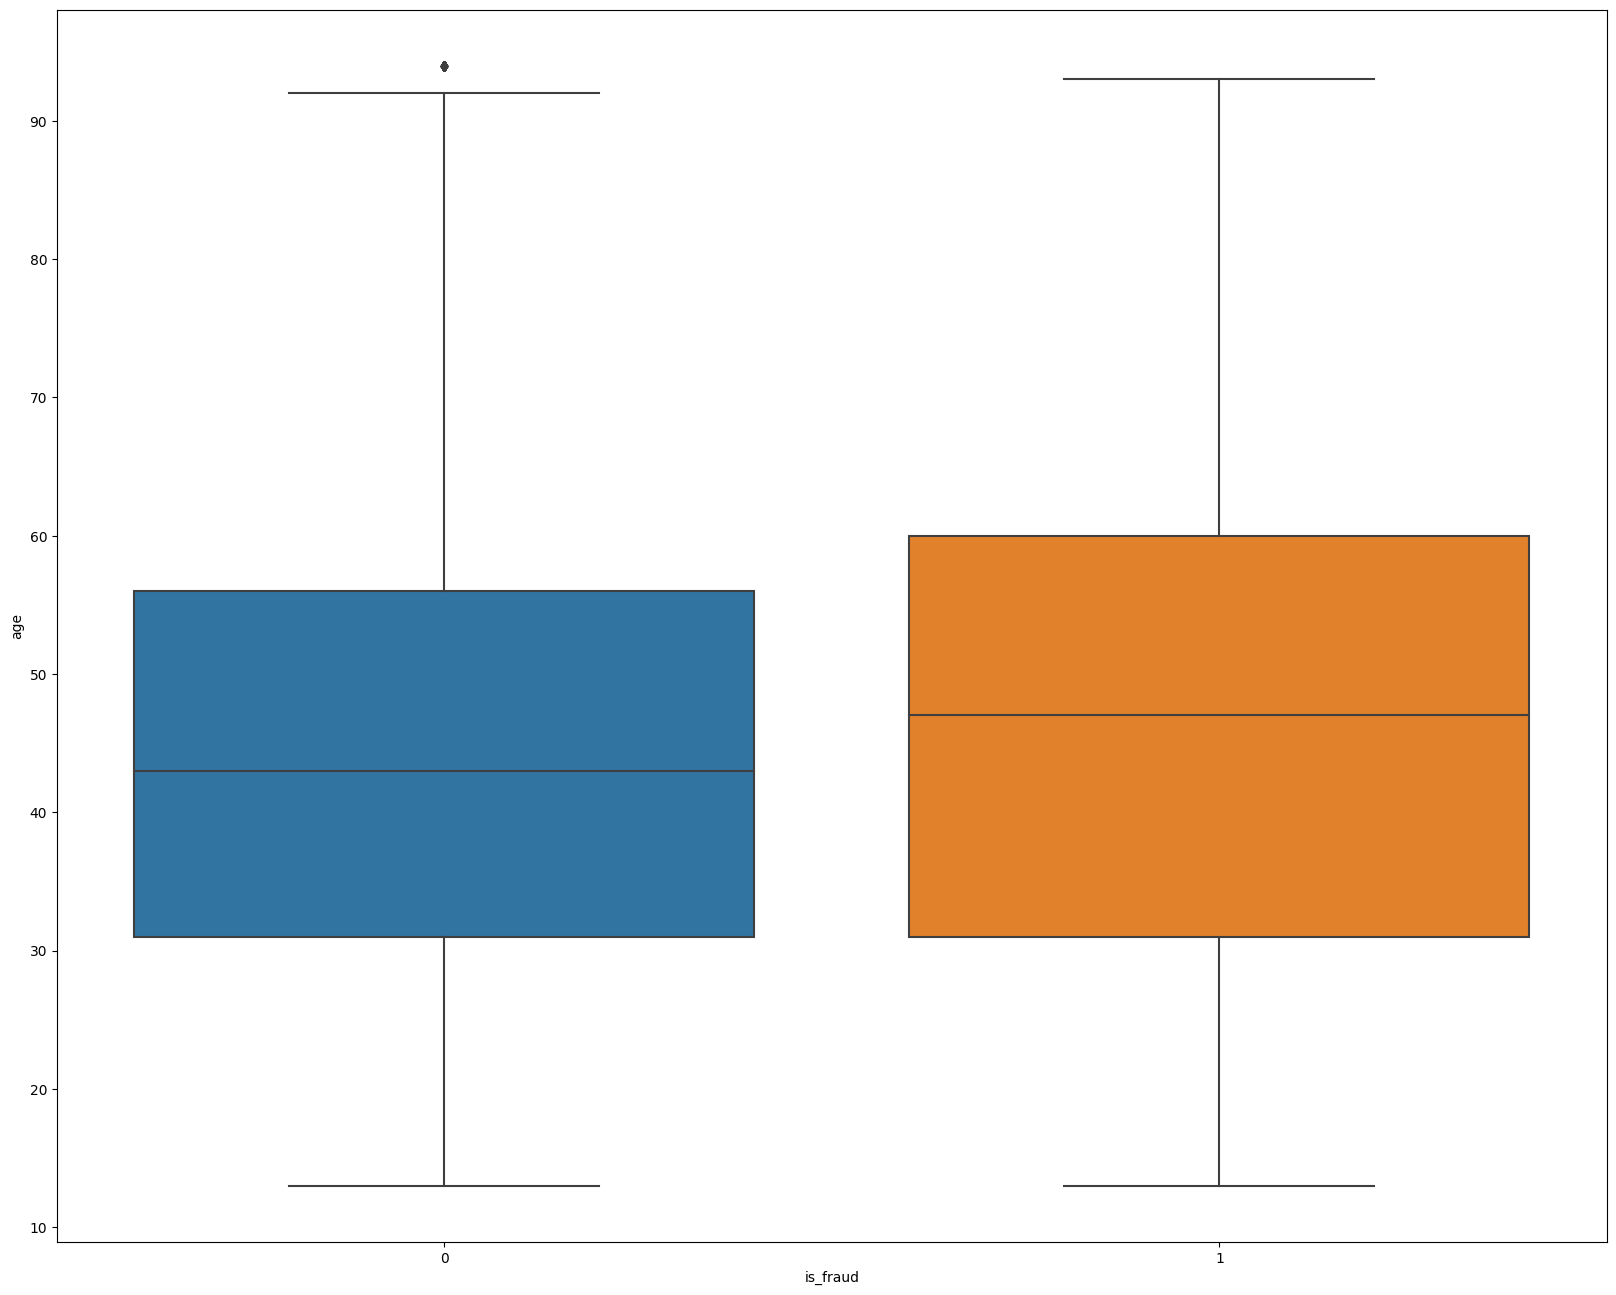

In [32]:
# boxplot 'age' by 'is_fraud'
sns.boxplot(x = 'is_fraud', y = 'age', data = df_sample)

In [33]:
# pairwise t-test (parametric - assumes data has a Gaussian/normal distribution)
pg.pairwise_ttests(data = df_sample, dv = 'age', between = 'is_fraud').round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,is_fraud,0,1,False,True,-5.122,1514.81,two-sided,0.0,1.399e+04,-0.144


In [34]:
# pairwise test (nonparametric - does not assume a particular distribution for the data)
pg.pairwise_ttests(data = df_sample, dv = 'age', between = 'is_fraud', parametric = False).round(3)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,is_fraud,0,1,False,False,178679415.0,two-sided,0.0,-0.144


Comment: Since the p-value (p-unc) is less than 0.05, we can **reject** the null hypothesis that the `age` grouped by `is_fraud` is not significant in favor of the alternate hypothesis, where there is a significant difference for customer `age` with no fraud transactions and fraudulent transactions.

<Axes: xlabel='is_fraud', ylabel='log_amt'>

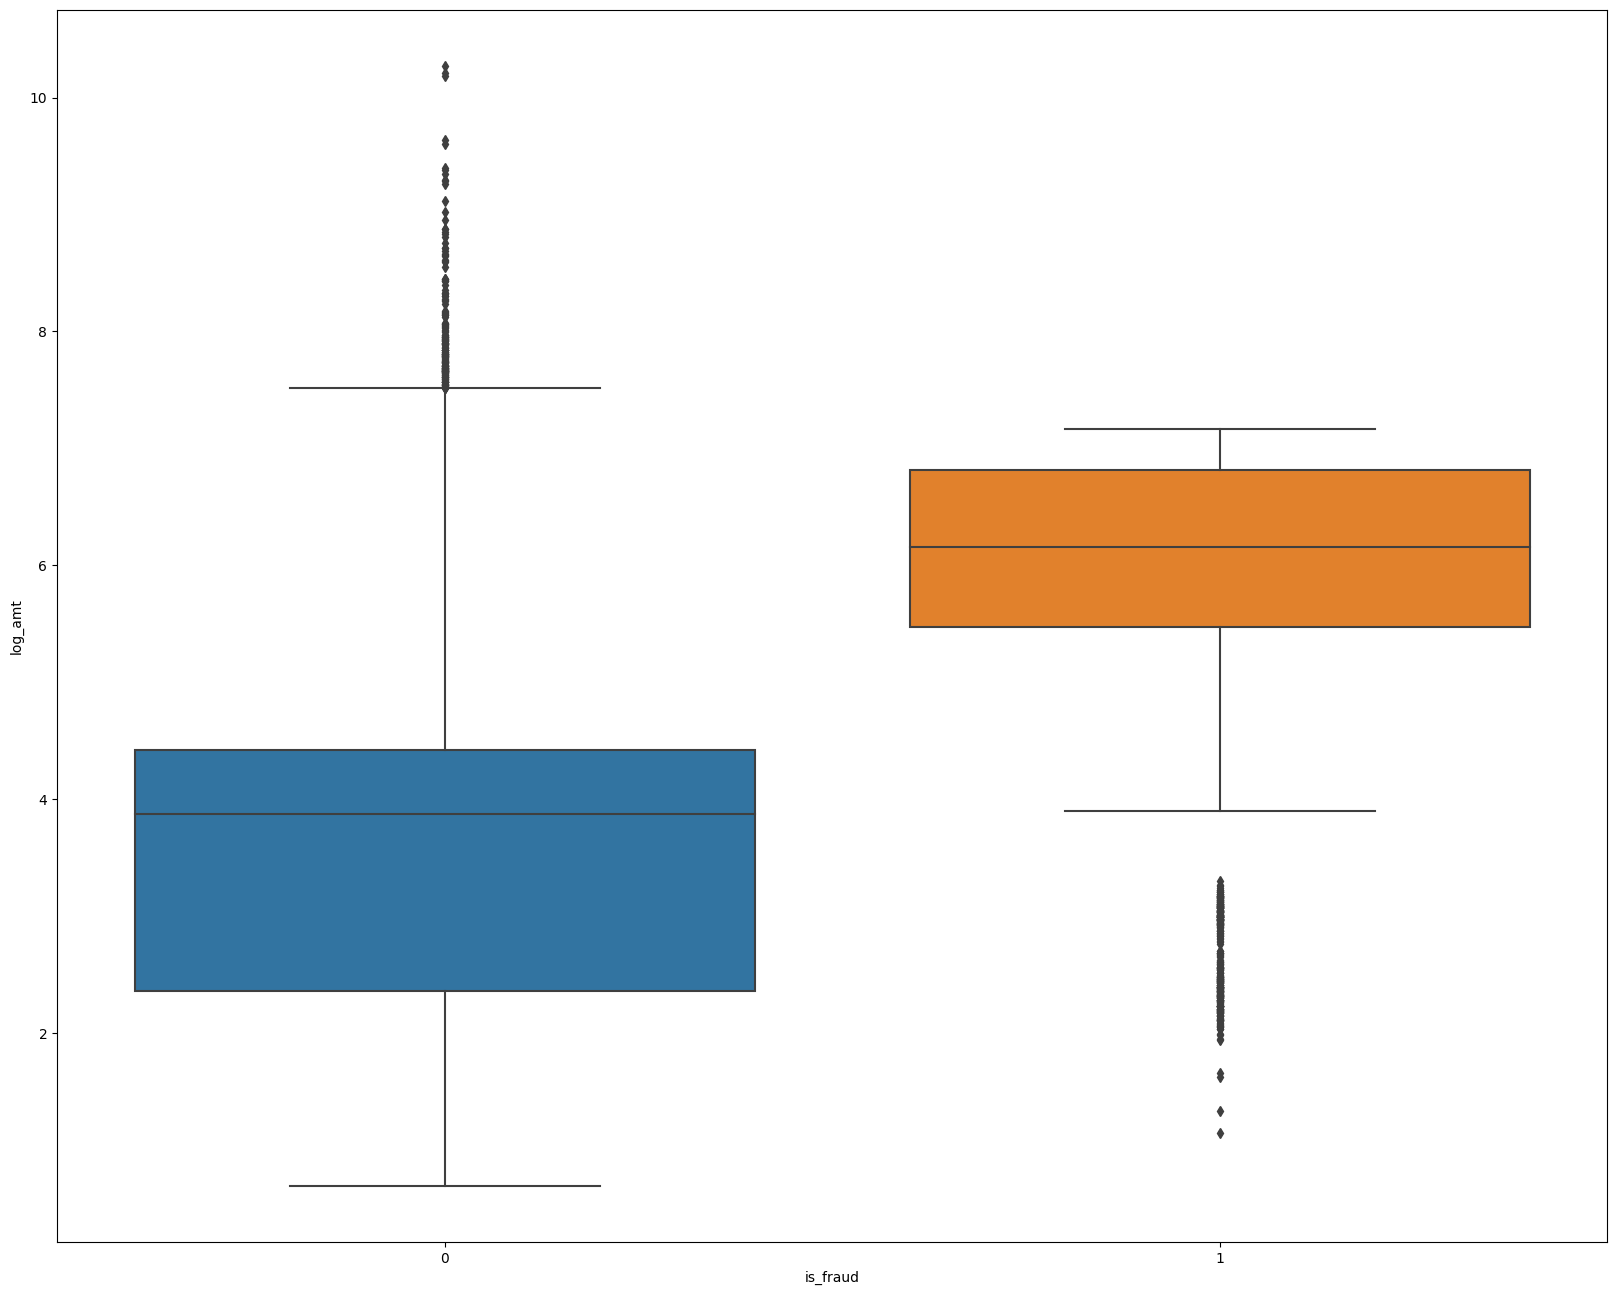

In [35]:
# `is_fraud` and `amt`
# sns.boxplot(x = 'is_fraud', y = 'amt', data = df_sample)
df_sample['log_amt'] = np.log1p(df_sample['amt'])
sns.boxplot(x = 'is_fraud', y = 'log_amt', data=df_sample)

In [36]:
# pairwise t-test (parametric)
pg.pairwise_ttests(data = df_sample, dv = 'log_amt', between = 'is_fraud').round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,is_fraud,0,1,False,True,-49.084,1510.817,two-sided,0.0,inf,-1.611


In [37]:
# pairwise test (nonparametric)
pg.pairwise_ttests(data = df_sample, dv = 'log_amt', between = 'is_fraud', parametric = False).round(3)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,is_fraud,0,1,False,False,63548587.0,two-sided,0.0,-1.611


Comment: Since the p-value (p-unc) is less than 0.05, the `log_amt` (log transaction amount) is significant to discriminate between legitimate and fraudulent transactions.

<Axes: xlabel='is_fraud', ylabel='count'>

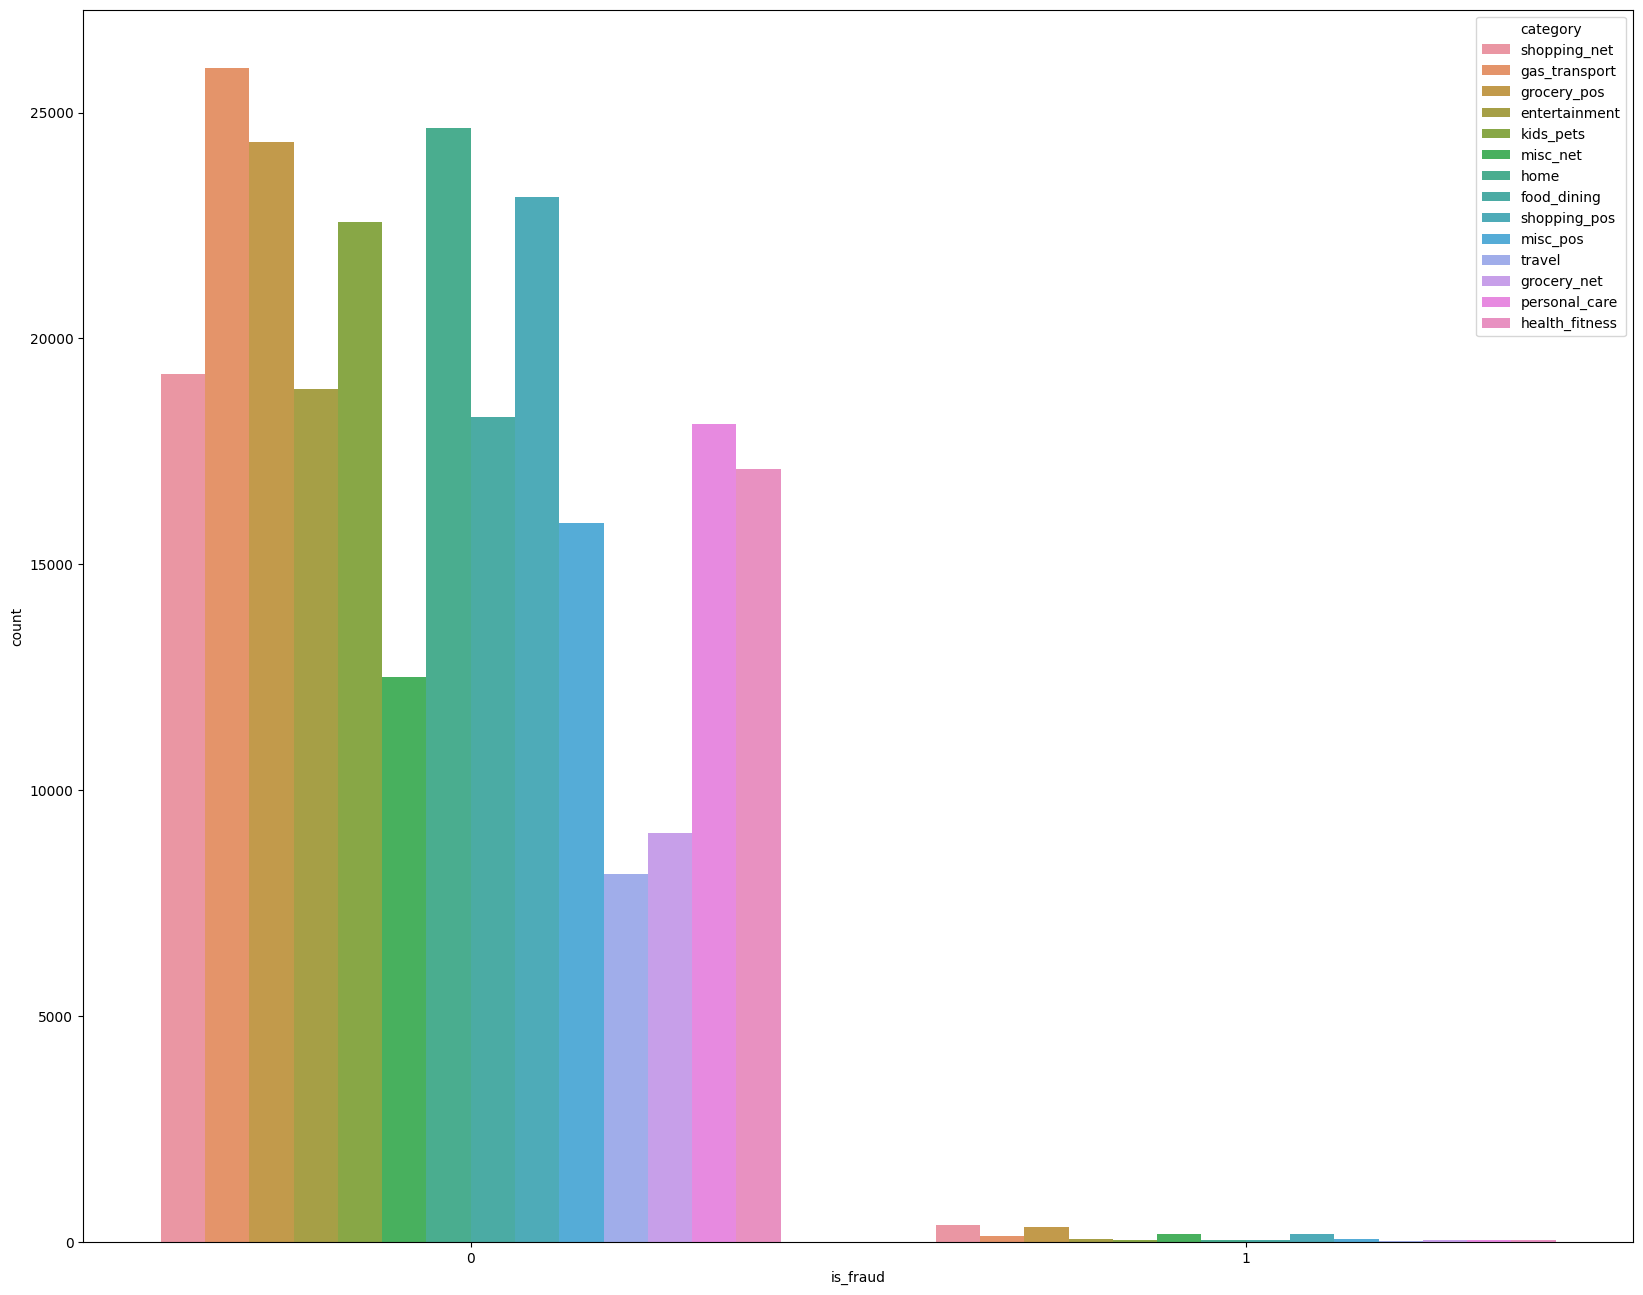

In [38]:
# `is_fraud` and `category`
sns.countplot(data = df_sample, x = 'is_fraud', hue = 'category')

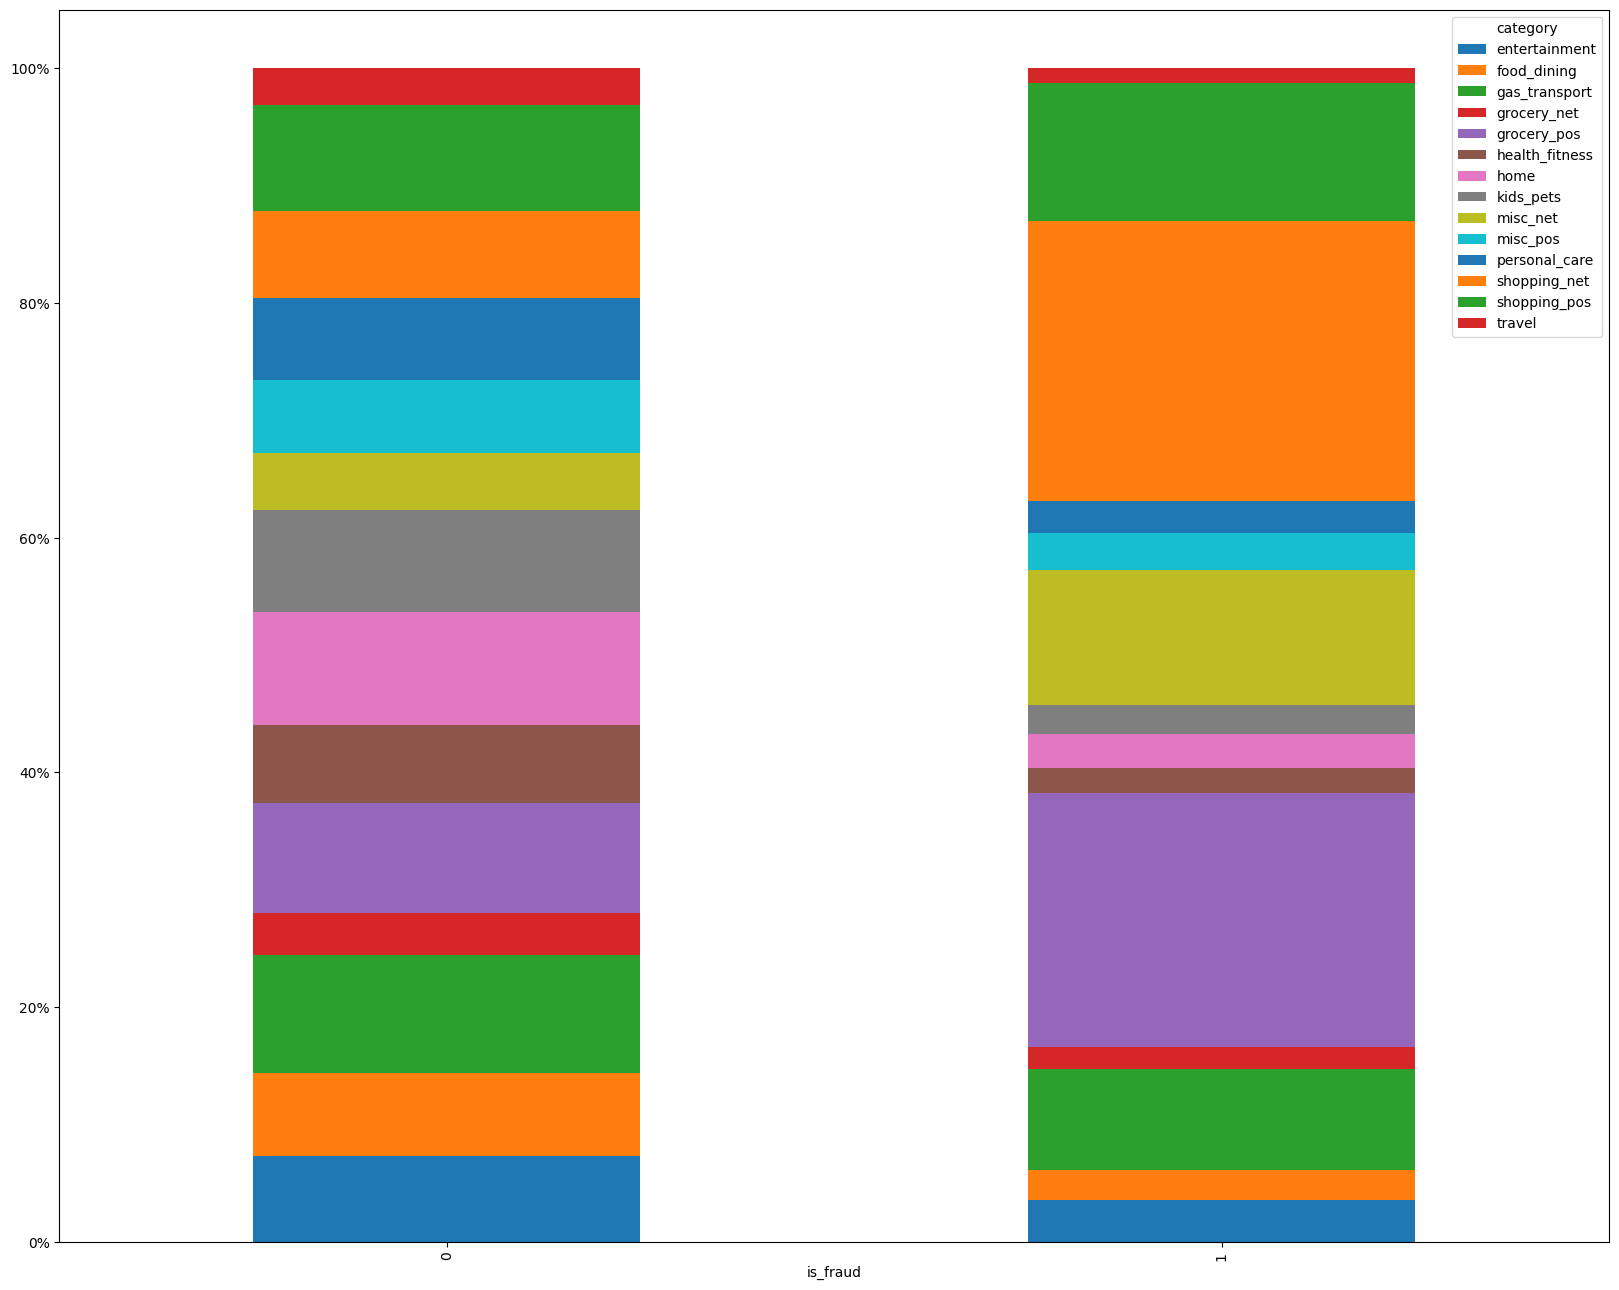

In [39]:
# Create stacked bar chart (percentages)

# Calculate the percentage of each category
grouped_data = df_sample.groupby(['is_fraud', 'category']).size().unstack()
percent_data = grouped_data.apply(lambda row: row / row.sum(), axis=1)

# Create stacked bar chart with percentages
# sns.set(style="whitegrid")
ax = percent_data.plot(kind="bar", stacked=True)

# Set y-axis as percentage
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.show()

In [40]:
# chi2 test for independence between two categorical variables
# `is_fraud` by `category`
pg.chi2_independence(data = df_sample, x = 'category', y = 'is_fraud')

(is_fraud                   0           1
 category                                
 entertainment   18814.470149  109.529851
 food_dining     18181.157029  105.842971
 gas_transport   25957.884227  151.115773
 grocery_net      9024.463408   52.536592
 grocery_pos     24526.218775  142.781225
 health_fitness  17043.778364   99.221636
 home            24563.004623  142.995377
 kids_pets       22483.112869  130.887131
 misc_net        12591.696493   73.303507
 misc_pos        15869.613851   92.386149
 personal_care   18033.019423  104.980577
 shopping_net    19453.748541  113.251459
 shopping_pos    23173.096080  134.903920
 travel           8118.736168   47.263832,
 is_fraud            0    1
 category                  
 entertainment   18871   53
 food_dining     18248   39
 gas_transport   25980  129
 grocery_net      9049   28
 grocery_pos     24344  325
 health_fitness  17111   32
 home            24663   43
 kids_pets       22577   37
 misc_net        12492  173
 misc_pos        15

Comment: Since the p-values for several tests are less than 0.05, there is a significant relationship between `category` and `is_fraud`. In particular, there is a significant difference in percent of total transactions for the `_net` categories.